In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
schools = pd.read_csv("pandas schools_complete.csv")
schools.head()

,School ID,school_name,type,size,budget
0,0,Huang High School,District,2917,1910635
1,1,Figueroa High School,District,2949,1884411
2,2,Shelton High School,Charter,1761,1056600
3,3,Hernandez High School,District,4635,3022020
4,4,Griffin High School,Charter,1468,917500


In [3]:
agg_functions = {
    'school_name' : 'count',
    'size'        : 'sum',
    'budget'      : 'sum'
}

districts_counts = schools.groupby(['type']).agg(agg_functions).reset_index()
districts_counts

,type,school_name,size,budget
0,Charter,8,12194,7301505
1,District,7,26976,17347923


In [4]:
students = pd.read_csv("pandas students_complete.csv")
students.head()

,Student ID,student_name,gender,grade,school_name,reading_score,math_score
0,0,Paul Bradley,M,9th,Huang High School,66,79
1,1,Victor Smith,M,12th,Huang High School,94,61
2,2,Kevin Rodriguez,M,12th,Huang High School,90,60
3,3,Dr. Richard Scott,M,12th,Huang High School,67,58
4,4,Bonnie Ray,F,9th,Huang High School,97,84


In [5]:
students = students.assign(passed_math = students.math_score >= 60)
students = students.assign(passed_reading = students.reading_score >= 60)
students.head()

,Student ID,student_name,gender,grade,school_name,reading_score,math_score,passed_math,passed_reading
0,0,Paul Bradley,M,9th,Huang High School,66,79,True,True
1,1,Victor Smith,M,12th,Huang High School,94,61,True,True
2,2,Kevin Rodriguez,M,12th,Huang High School,90,60,True,True
3,3,Dr. Richard Scott,M,12th,Huang High School,67,58,False,True
4,4,Bonnie Ray,F,9th,Huang High School,97,84,True,True


### District Summary

* Create a high-level snapshot (in table form) of the district's key metrics, including:
  * Total Schools
  * Total Students
  * Total Budget
  * Average Math Score
  * Average Reading Score
  * % Passing Math
  * % Passing Reading
  * Overall Passing Rate (Average of the above two)


In [6]:
schools_students = pd.merge(schools, students, on = 'school_name')
schools_students.head()

,School ID,school_name,type,size,budget,Student ID,student_name,gender,grade,reading_score,math_score,passed_math,passed_reading
0,0,Huang High School,District,2917,1910635,0,Paul Bradley,M,9th,66,79,True,True
1,0,Huang High School,District,2917,1910635,1,Victor Smith,M,12th,94,61,True,True
2,0,Huang High School,District,2917,1910635,2,Kevin Rodriguez,M,12th,90,60,True,True
3,0,Huang High School,District,2917,1910635,3,Dr. Richard Scott,M,12th,67,58,False,True
4,0,Huang High School,District,2917,1910635,4,Bonnie Ray,F,9th,97,84,True,True


In [7]:
agg_functions = {
    'math_score'     : 'mean',
    'reading_score'  : 'mean',
    'passed_math'    : 'sum',
    'passed_reading' : 'sum',
    }

columns = ['type', 'math_score', 'reading_score', 'passed_math', 'passed_reading']

districts_avgs = schools_students[columns].groupby('type').agg(agg_functions).reset_index()
districts_avgs

,type,math_score,reading_score,passed_math,passed_reading
0,Charter,83.406183,83.902821,12194.0,12194.0
1,District,76.987026,80.962485,24017.0,26976.0


In [8]:
districts_summary = pd.merge(districts_counts, districts_avgs, on = 'type')
districts_summary

,type,school_name,size,budget,math_score,reading_score,passed_math,passed_reading
0,Charter,8,12194,7301505,83.406183,83.902821,12194.0,12194.0
1,District,7,26976,17347923,76.987026,80.962485,24017.0,26976.0


In [9]:
districts_math_passing_rate = districts_summary[['passed_math',    'size']].apply(lambda x: 100*x[0]/x[1], axis=1)
districts_read_passing_rate = districts_summary[['passed_reading', 'size']].apply(lambda x: 100*x[0]/x[1], axis=1)
districts_summary = districts_summary.assign(math_passing_rate = districts_math_passing_rate,
                                             read_passing_rate = districts_read_passing_rate)

districts_overall_pass_rate = districts_summary[['math_passing_rate', 'read_passing_rate']].apply(np.mean, axis=1)
districts_summary = districts_summary.assign(overall_passing_rate = districts_overall_pass_rate)
districts_summary.rename(columns = {'school_name': 'total_schools'})

,type,total_schools,size,budget,math_score,reading_score,passed_math,passed_reading,math_passing_rate,read_passing_rate,overall_passing_rate
0,Charter,8,12194,7301505,83.406183,83.902821,12194.0,12194.0,100.000000,100.0,100.000000
1,District,7,26976,17347923,76.987026,80.962485,24017.0,26976.0,89.030991,100.0,94.515495


### School Summary

* Create an overview table that summarizes key metrics about each school, including:
  * School Name
  * School Type
  * Total Students
  * Total School Budget
  * Per Student Budget
  * Average Math Score
  * Average Reading Score
  * % Passing Math
  * % Passing Reading
  * Overall Passing Rate (Average of the above two)


In [10]:
schools_students.head(2)

,School ID,school_name,type,size,budget,Student ID,student_name,gender,grade,reading_score,math_score,passed_math,passed_reading
0,0,Huang High School,District,2917,1910635,0,Paul Bradley,M,9th,66,79,True,True
1,0,Huang High School,District,2917,1910635,1,Victor Smith,M,12th,94,61,True,True


In [11]:
# Grouping Schools by functions from table students
agg_functions = {
    'math_score'      : 'mean',
    'reading_score'   : 'mean',
    'passed_math'     : 'sum',
    'passed_reading'  : 'sum',
    'size'            : 'min'
}

schools_avgs = schools_students.groupby(['school_name', 'type', 'budget']).agg(agg_functions).reset_index()

schools_math_passing_rate  = schools_avgs[['passed_math',    'size']].apply(lambda x: 100*x[0]/x[1], axis=1)
schools_read_passing_rate  = schools_avgs[['passed_reading', 'size']].apply(lambda x: 100*x[0]/x[1], axis=1)
schools_per_student_budget = schools_avgs[['budget', 'size']].apply(lambda x: x[0]/x[1], axis=1)
schools_summary = schools_avgs.assign(math_passing_rate  = schools_math_passing_rate,
                                      read_passing_rate  = schools_read_passing_rate,
                                      per_student_budget = schools_per_student_budget)

schools_summary.head(2)

,school_name,type,budget,math_score,reading_score,passed_math,passed_reading,size,math_passing_rate,read_passing_rate,per_student_budget
0,Bailey High School,District,3124928,77.048432,81.033963,4455.0,4976.0,4976,89.529743,100.0,628.0
1,Cabrera High School,Charter,1081356,83.061895,83.975780,1858.0,1858.0,1858,100.000000,100.0,582.0


In [12]:
schools_overall_pass_rate = schools_summary[['math_passing_rate', 'read_passing_rate']].apply(np.mean, axis=1)
schools_summary = schools_summary.assign(overall_passing_rate = schools_overall_pass_rate)
column_rename_dic = {
        'school_name'          : 'School Name',
        'type'                 : 'School Type',
        'size'                 : 'Total Students',
        'budget'               : 'Total School Budget',
        'per_student_budget'   : 'Per Student Budget',
        'math_score'           : 'Average Math Score',
        'reading_score'        : 'Average Reading Score',
        'math_passing_rate'    : '% Passing Math',
        'read_passing_rate'    : '% Passing Reading',
        'overall_passing_rate' : 'Overall Passing Rate'
    }

schools_summary = schools_summary[list(column_rename_dic.keys())].rename(columns = column_rename_dic)
schools_summary

,School Name,School Type,Total Students,Total School Budget,Per Student Budget,Average Math Score,Average Reading Score,% Passing Math,% Passing Reading,Overall Passing Rate
0,Bailey High School,District,4976,3124928,628.0,77.048432,81.033963,89.529743,100.0,94.764871
1,Cabrera High School,Charter,1858,1081356,582.0,83.061895,83.975780,100.000000,100.0,100.000000
2,Figueroa High School,District,2949,1884411,639.0,76.711767,81.158020,88.436758,100.0,94.218379
3,Ford High School,District,2739,1763916,644.0,77.102592,80.746258,89.302665,100.0,94.651333
4,Griffin High School,Charter,1468,917500,625.0,83.351499,83.816757,100.000000,100.0,100.000000
5,Hernandez High School,District,4635,3022020,652.0,77.289752,80.934412,89.083064,100.0,94.541532
6,Holden High School,Charter,427,248087,581.0,83.803279,83.814988,100.000000,100.0,100.000000
7,Huang High School,District,2917,1910635,655.0,76.629414,81.182722,88.858416,100.0,94.429208
8,Johnson High School,District,4761,3094650,650.0,77.072464,80.966394,89.182945,100.0,94.591472
9,Pena High School,Charter,962,585858,609.0,83.839917,84.044699,100.000000,100.0,100.000000


### Top Performing Schools (By Passing Rate)

* Create a table that highlights the top 5 performing schools based on Overall Passing Rate. Include:
  * School Name
  * School Type
  * Total Students
  * Total School Budget
  * Per Student Budget
  * Average Math Score
  * Average Reading Score
  * % Passing Math
  * % Passing Reading
  * Overall Passing Rate (Average of the above two)


In [13]:
top5 = schools_summary.sort_values('Overall Passing Rate', ascending = False).head(5)
top5

,School Name,School Type,Total Students,Total School Budget,Per Student Budget,Average Math Score,Average Reading Score,% Passing Math,% Passing Reading,Overall Passing Rate
1,Cabrera High School,Charter,1858,1081356,582.0,83.061895,83.975780,100.0,100.0,100.0
4,Griffin High School,Charter,1468,917500,625.0,83.351499,83.816757,100.0,100.0,100.0
6,Holden High School,Charter,427,248087,581.0,83.803279,83.814988,100.0,100.0,100.0
9,Pena High School,Charter,962,585858,609.0,83.839917,84.044699,100.0,100.0,100.0
11,Shelton High School,Charter,1761,1056600,600.0,83.359455,83.725724,100.0,100.0,100.0


### Bottom Performing Schools (By Passing Rate)

* Create a table that highlights the bottom 5 performing schools based on Overall Passing Rate. Include all of the same metrics as above.


In [14]:
bottom5 = schools_summary.sort_values('Overall Passing Rate', ascending = True).head(5)
bottom5

,School Name,School Type,Total Students,Total School Budget,Per Student Budget,Average Math Score,Average Reading Score,% Passing Math,% Passing Reading,Overall Passing Rate
2,Figueroa High School,District,2949,1884411,639.0,76.711767,81.158020,88.436758,100.0,94.218379
10,Rodriguez High School,District,3999,2547363,637.0,76.842711,80.744686,88.547137,100.0,94.273568
7,Huang High School,District,2917,1910635,655.0,76.629414,81.182722,88.858416,100.0,94.429208
5,Hernandez High School,District,4635,3022020,652.0,77.289752,80.934412,89.083064,100.0,94.541532
8,Johnson High School,District,4761,3094650,650.0,77.072464,80.966394,89.182945,100.0,94.591472


### Math Scores by Grade\*\*

* Create a table that lists the average Math Score for students of each grade level (9th, 10th, 11th, 12th) at each school.


In [15]:
# Just selecting the correct columns
students[['school_name', 'grade', 'math_score']].head()

,school_name,grade,math_score
0,Huang High School,9th,79
1,Huang High School,12th,61
2,Huang High School,12th,60
3,Huang High School,12th,58
4,Huang High School,9th,84


In [16]:
# Calculating the mean 'math_score', grouped by school name and grade
avg_math_score_by_grade = students[['school_name', 'grade', 'math_score']].groupby(['school_name', 'grade']).mean().reset_index()
avg_math_score_by_grade

,school_name,grade,math_score
0,Bailey High School,10th,76.996772
1,Bailey High School,11th,77.515588
2,Bailey High School,12th,76.492218
3,Bailey High School,9th,77.083676
4,Cabrera High School,10th,83.154506
5,Cabrera High School,11th,82.765560
6,Cabrera High School,12th,83.277487
7,Cabrera High School,9th,83.094697
8,Figueroa High School,10th,76.539974
9,Figueroa High School,11th,76.884344


In [17]:
# We had to remove the 'th' from column grade and make it an integer
avg_math_score_by_grade = avg_math_score_by_grade.assign(num_grade = avg_math_score_by_grade.grade.str.replace('th', '').astype(int))

In [18]:
# We are sorting by school name and num. grade, and then removing (dropping) column 'num_grade'
avg_math_score_by_grade.sort_values(['school_name', 'num_grade']).drop('num_grade', axis=1)

,school_name,grade,math_score
3,Bailey High School,9th,77.083676
0,Bailey High School,10th,76.996772
1,Bailey High School,11th,77.515588
2,Bailey High School,12th,76.492218
7,Cabrera High School,9th,83.094697
4,Cabrera High School,10th,83.154506
5,Cabrera High School,11th,82.765560
6,Cabrera High School,12th,83.277487
11,Figueroa High School,9th,76.403037
8,Figueroa High School,10th,76.539974



### Reading Scores by Grade

* Create a table that lists the average Reading Score for students of each grade level (9th, 10th, 11th, 12th) at each school.


In [19]:
avg_read_score_by_grade = students[['school_name', 'grade', 'reading_score']].groupby(['school_name', 'grade']).mean().reset_index()
avg_read_score_by_grade = avg_read_score_by_grade.assign(num_grade = avg_read_score_by_grade.grade.str.replace('th', '').astype(int))
avg_read_score_by_grade.sort_values(['school_name', 'num_grade']).drop('num_grade', axis=1)

,school_name,grade,reading_score
3,Bailey High School,9th,81.303155
0,Bailey High School,10th,80.907183
1,Bailey High School,11th,80.945643
2,Bailey High School,12th,80.912451
7,Cabrera High School,9th,83.676136
4,Cabrera High School,10th,84.253219
5,Cabrera High School,11th,83.788382
6,Cabrera High School,12th,84.287958
11,Figueroa High School,9th,81.198598
8,Figueroa High School,10th,81.408912



### Scores by School Spending

* Create a table that breaks down school performances based on average Spending Ranges (Per Student). Use 4 reasonable bins to group school spending. Include in the table each of the following:
  * Average Math Score
  * Average Reading Score
  * % Passing Math
  * % Passing Reading
  * Overall Passing Rate (Average of the above two)


In [20]:
schools_summary.head()

,School Name,School Type,Total Students,Total School Budget,Per Student Budget,Average Math Score,Average Reading Score,% Passing Math,% Passing Reading,Overall Passing Rate
0,Bailey High School,District,4976,3124928,628.0,77.048432,81.033963,89.529743,100.0,94.764871
1,Cabrera High School,Charter,1858,1081356,582.0,83.061895,83.975780,100.000000,100.0,100.000000
2,Figueroa High School,District,2949,1884411,639.0,76.711767,81.158020,88.436758,100.0,94.218379
3,Ford High School,District,2739,1763916,644.0,77.102592,80.746258,89.302665,100.0,94.651333
4,Griffin High School,Charter,1468,917500,625.0,83.351499,83.816757,100.000000,100.0,100.000000


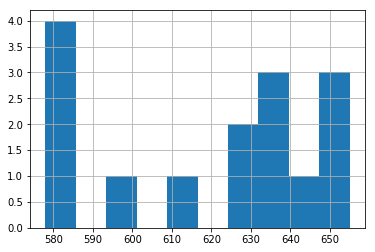

In [21]:
schools_summary['Per Student Budget'].hist()

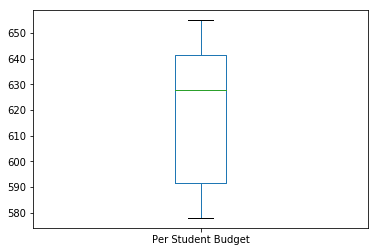

In [22]:
schools_summary['Per Student Budget'].plot('box')

In [23]:
schools_summary['Per Student Budget'].describe()

count     15.000000
mean     620.066667
std       28.544368
min      578.000000
25%      591.500000
50%      628.000000
75%      641.500000
max      655.000000
Name: Per Student Budget, dtype: float64

In [24]:
# Spending bins

# bin1 578 - 598
# bin2 599 - 618
# bin3 619 - 638
# bin4 639 - 655

def choose_spending_bin(value): # scope of the function
    if 578 <= value <= 598: # scope of the if statement
        return 'low'
    elif 599 <= value <= 618:
        return 'medium-low'
    elif 619 <= value <= 638:
        return 'medium-high'
    elif 639 <= value:
        return 'high'
    

In [25]:
spending_bins = schools_summary['Per Student Budget'].apply(choose_spending_bin)
schools_summary = schools_summary.assign(spending_bin = spending_bins)
schools_summary

,School Name,School Type,Total Students,Total School Budget,Per Student Budget,Average Math Score,Average Reading Score,% Passing Math,% Passing Reading,Overall Passing Rate,spending_bin
0,Bailey High School,District,4976,3124928,628.0,77.048432,81.033963,89.529743,100.0,94.764871,medium-high
1,Cabrera High School,Charter,1858,1081356,582.0,83.061895,83.975780,100.000000,100.0,100.000000,low
2,Figueroa High School,District,2949,1884411,639.0,76.711767,81.158020,88.436758,100.0,94.218379,high
3,Ford High School,District,2739,1763916,644.0,77.102592,80.746258,89.302665,100.0,94.651333,high
4,Griffin High School,Charter,1468,917500,625.0,83.351499,83.816757,100.000000,100.0,100.000000,medium-high
5,Hernandez High School,District,4635,3022020,652.0,77.289752,80.934412,89.083064,100.0,94.541532,high
6,Holden High School,Charter,427,248087,581.0,83.803279,83.814988,100.000000,100.0,100.000000,low
7,Huang High School,District,2917,1910635,655.0,76.629414,81.182722,88.858416,100.0,94.429208,high
8,Johnson High School,District,4761,3094650,650.0,77.072464,80.966394,89.182945,100.0,94.591472,high
9,Pena High School,Charter,962,585858,609.0,83.839917,84.044699,100.000000,100.0,100.000000,medium-low


In [26]:
schools_summary[['Average Math Score', 'Average Reading Score',
                 '% Passing Math', '% Passing Reading',
                 'Overall Passing Rate', 'spending_bin']].groupby('spending_bin').mean().reset_index()

,spending_bin,Average Math Score,Average Reading Score,% Passing Math,% Passing Reading,Overall Passing Rate
0,high,76.961198,80.997561,88.97277,100.0,94.486385
1,low,83.455399,83.933814,100.00000,100.0,100.000000
2,medium-high,80.165248,82.361084,94.51922,100.0,97.259610
3,medium-low,83.599686,83.885211,100.00000,100.0,100.000000


### Scores by School Size

* Repeat the above breakdown, but this time group schools based on a reasonable approximation of school size (Small, Medium, Large).


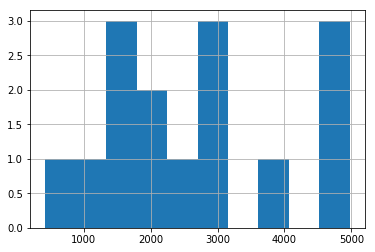

In [27]:
schools_summary['Total Students'].hist()

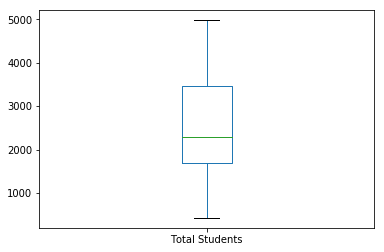

In [28]:
schools_summary['Total Students'].plot('box')

In [29]:
schools_summary['Total Students'].describe()

count      15.000000
mean     2611.333333
std      1420.915282
min       427.000000
25%      1698.000000
50%      2283.000000
75%      3474.000000
max      4976.000000
Name: Total Students, dtype: float64

In [30]:
# Size bins

# bin1 0 - 1500
# bin2 1501 - 3000
# bin3 3001 - 5000

def choose_size_bin(value): # scope of the function
    if value <= 1500: # scope of the if statement
        return 'small'
    elif 1501 <= value <= 3000:
        return 'medium'
    elif 3001 <= value:
        return 'large'

In [31]:
size_bins = schools_summary['Total Students'].apply(choose_size_bin)
schools_summary = schools_summary.assign(size_bin = size_bins)
schools_summary

,School Name,School Type,Total Students,Total School Budget,Per Student Budget,Average Math Score,Average Reading Score,% Passing Math,% Passing Reading,Overall Passing Rate,spending_bin,size_bin
0,Bailey High School,District,4976,3124928,628.0,77.048432,81.033963,89.529743,100.0,94.764871,medium-high,large
1,Cabrera High School,Charter,1858,1081356,582.0,83.061895,83.975780,100.000000,100.0,100.000000,low,medium
2,Figueroa High School,District,2949,1884411,639.0,76.711767,81.158020,88.436758,100.0,94.218379,high,medium
3,Ford High School,District,2739,1763916,644.0,77.102592,80.746258,89.302665,100.0,94.651333,high,medium
4,Griffin High School,Charter,1468,917500,625.0,83.351499,83.816757,100.000000,100.0,100.000000,medium-high,small
5,Hernandez High School,District,4635,3022020,652.0,77.289752,80.934412,89.083064,100.0,94.541532,high,large
6,Holden High School,Charter,427,248087,581.0,83.803279,83.814988,100.000000,100.0,100.000000,low,small
7,Huang High School,District,2917,1910635,655.0,76.629414,81.182722,88.858416,100.0,94.429208,high,medium
8,Johnson High School,District,4761,3094650,650.0,77.072464,80.966394,89.182945,100.0,94.591472,high,large
9,Pena High School,Charter,962,585858,609.0,83.839917,84.044699,100.000000,100.0,100.000000,medium-low,small


In [32]:
schools_summary[['Average Math Score', 'Average Reading Score',
                 '% Passing Math', '% Passing Reading',
                 'Overall Passing Rate', 'size_bin']].groupby('size_bin').mean().reset_index()

,size_bin,Average Math Score,Average Reading Score,% Passing Math,% Passing Reading,Overall Passing Rate
0,large,77.063340,80.919864,89.085722,100.0,94.542861
1,medium,80.904987,82.822740,95.824730,100.0,97.912365
2,small,83.664898,83.892148,100.000000,100.0,100.000000


### Scores by School Type

* Repeat the above breakdown, but this time group schools based on school type (Charter vs. District).


In [33]:
schools_summary[['Average Math Score', 'Average Reading Score',
                 '% Passing Math', '% Passing Reading',
                 'Overall Passing Rate', 'School Type']].groupby('School Type').mean().reset_index()

,School Type,Average Math Score,Average Reading Score,% Passing Math,% Passing Reading,Overall Passing Rate
0,Charter,83.473852,83.896421,100.000000,100.0,100.000000
1,District,76.956733,80.966636,88.991533,100.0,94.495766
